In [12]:
require("ggplot2")
require("dbscan")

In [ ]:
install.packages("dbscan")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [16]:
cr <- read.csv("/home/RHHLab/Research/DhaleshwariFish/Python/data/individual/cr.csv")
mn <- read.csv("/home/RHHLab/Research/DhaleshwariFish/Python/data/individual/mn.csv")
fe <- read.csv("/home/RHHLab/Research/DhaleshwariFish/Python/data/individual/fe.csv")
as <- read.csv("/home/RHHLab/Research/DhaleshwariFish/Python/data/individual/as.csv")
se <- read.csv("/home/RHHLab/Research/DhaleshwariFish/Python/data/individual/se.csv")
cu <- read.csv("/home/RHHLab/Research/DhaleshwariFish/Python/data/individual/cu.csv")
cd <- read.csv("/home/RHHLab/Research/DhaleshwariFish/Python/data/individual/cd.csv")
co <- read.csv("/home/RHHLab/Research/DhaleshwariFish/Python/data/individual/co.csv")
pb <- read.csv("/home/RHHLab/Research/DhaleshwariFish/Python/data/individual/pb.csv")
hg <- read.csv("/home/RHHLab/Research/DhaleshwariFish/Python/data/individual/hg.csv")
zn <- read.csv("/home/RHHLab/Research/DhaleshwariFish/Python/data/individual/zn.csv")

In [17]:
cr

X,Cr,Fish
<int>,<dbl>,<chr>
0,0.69,Ghagra (Clupisoma garua)
1,0.95,Koi (Anabas testudineus)
2,1.36,Tatkini (Cirrhinus reba)
3,2.37,Tengra (Mystus vittatus)
4,0.27,Batashi (Neotropius atherinoides)
5,1.13,Jatka (juvenile) Tenualosa ilisha
6,1.02,Rani (Botia dario)
7,1.98,Chanda (Pseudambassis ranga)


In [20]:
crcluster <- cr[, 1:2]
crcluster

X,Cr
<int>,<dbl>
0,0.69
1,0.95
2,1.36
3,2.37
4,0.27
5,1.13
6,1.02
7,1.98


In [104]:
cl <- hdbscan(crcluster, minPts = 2)
cl

HDBSCAN clustering for 8 objects.
Parameters: minPts = 2
The clustering contains 2 cluster(s) and 0 noise points.

1 2 
4 4 

Available fields: cluster, minPts, coredist, cluster_scores,
                  membership_prob, outlier_scores, hc

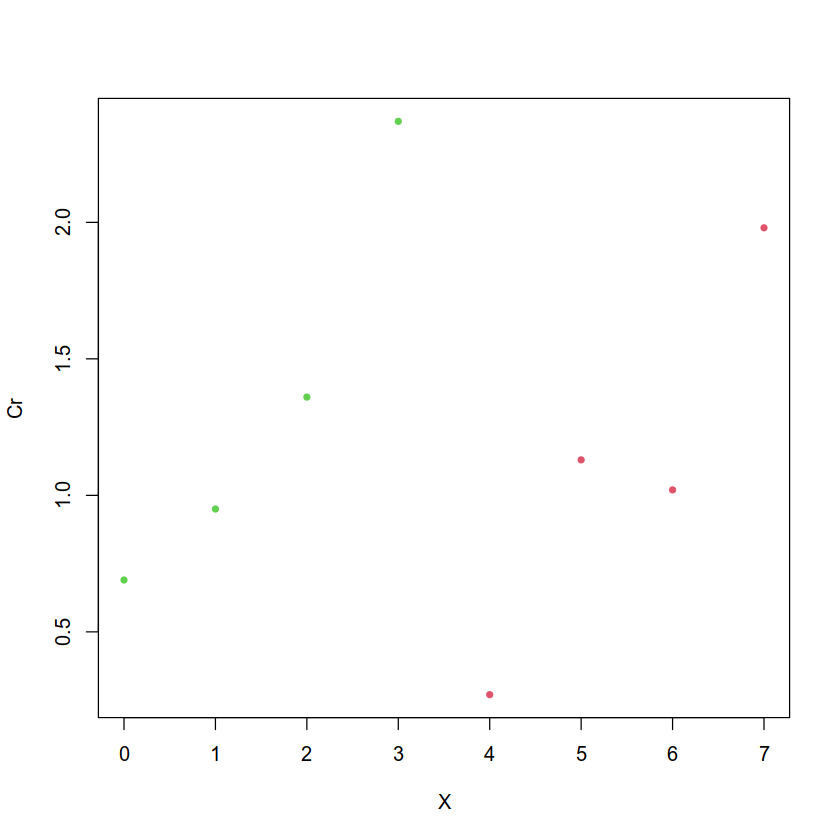

In [105]:
plot(crcluster, col=cl$cluster+1, pch=20)

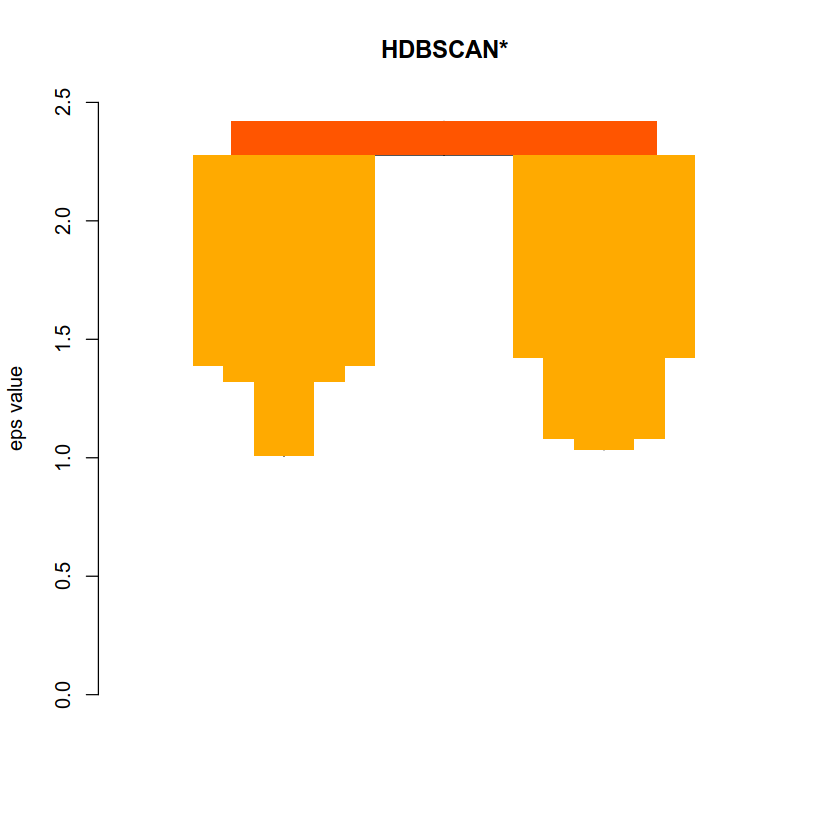

In [106]:
plot(cl)

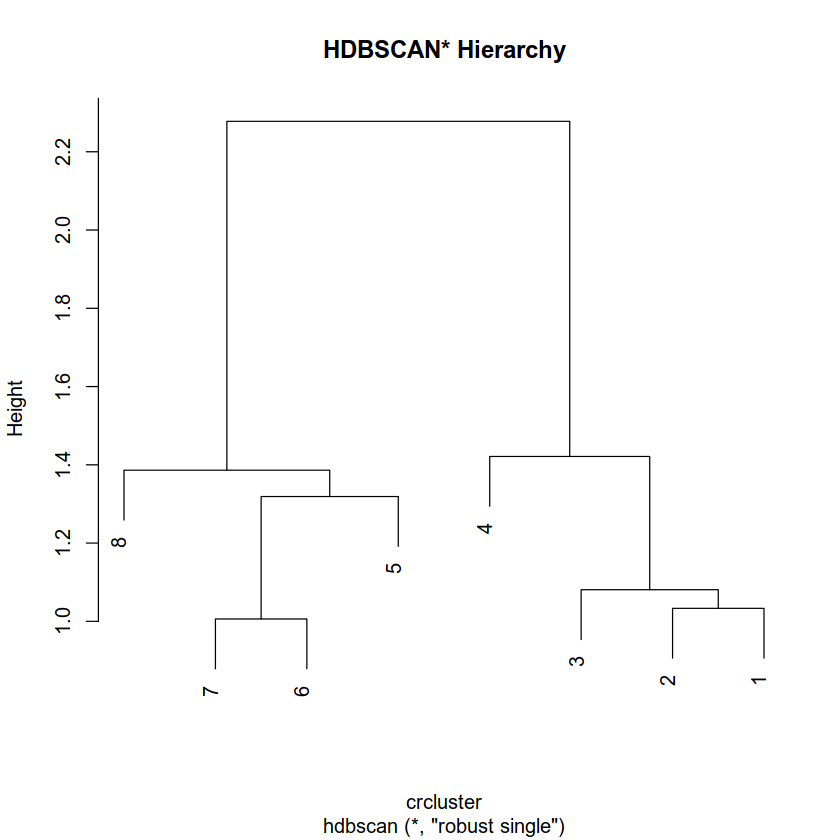

In [27]:
plot(cl$hc, main="HDBSCAN* Hierarchy")

In [207]:
cr$Fish <- as.character(x = cr$Fish)
rownames(cr) <- c(cr$Fish)
crnew <- cr[,-3]

In [31]:
str(cr)

'data.frame':	8 obs. of  3 variables:
 $ X   : int  0 1 2 3 4 5 6 7
 $ Cr  : num  0.69 0.95 1.36 2.37 0.27 1.13 1.02 1.98
 $ Fish: chr  "Ghagra (Clupisoma garua)" "Koi (Anabas testudineus)" "Tatkini (Cirrhinus reba)" "Tengra (Mystus vittatus)" ...


In [53]:
rownames(cr) <- c(cr$Fish)

In [54]:
cr

,X,Cr,Fish
,<int>,<dbl>,<chr>
Ghagra (Clupisoma garua),0,0.69,Ghagra (Clupisoma garua)
Koi (Anabas testudineus),1,0.95,Koi (Anabas testudineus)
Tatkini (Cirrhinus reba),2,1.36,Tatkini (Cirrhinus reba)
Tengra (Mystus vittatus),3,2.37,Tengra (Mystus vittatus)
Batashi (Neotropius atherinoides),4,0.27,Batashi (Neotropius atherinoides)
Jatka (juvenile) Tenualosa ilisha,5,1.13,Jatka (juvenile) Tenualosa ilisha
Rani (Botia dario),6,1.02,Rani (Botia dario)
Chanda (Pseudambassis ranga),7,1.98,Chanda (Pseudambassis ranga)


In [55]:
crnew <- cr[,-3]

In [56]:
crnew.scaled <- scale(crnew)
crnew.scaled

,X,Cr
Ghagra (Clupisoma garua),-1.4288690,-0.7827887
Koi (Anabas testudineus),-1.0206207,-0.3996827
Tatkini (Cirrhinus reba),-0.6123724,0.2044460
Tengra (Mystus vittatus),-0.2041241,1.6926655
Batashi (Neotropius atherinoides),0.2041241,-1.4016523
Jatka (juvenile) Tenualosa ilisha,0.6123724,-0.1344555
Rani (Botia dario),1.0206207,-0.2965388
Chanda (Pseudambassis ranga),1.4288690,1.1180065


In [57]:
cl <- hdbscan(crnew, minPts = 2)
cl

HDBSCAN clustering for 8 objects.
Parameters: minPts = 2
The clustering contains 2 cluster(s) and 0 noise points.

1 2 
4 4 

Available fields: cluster, minPts, coredist, cluster_scores,
                  membership_prob, outlier_scores, hc

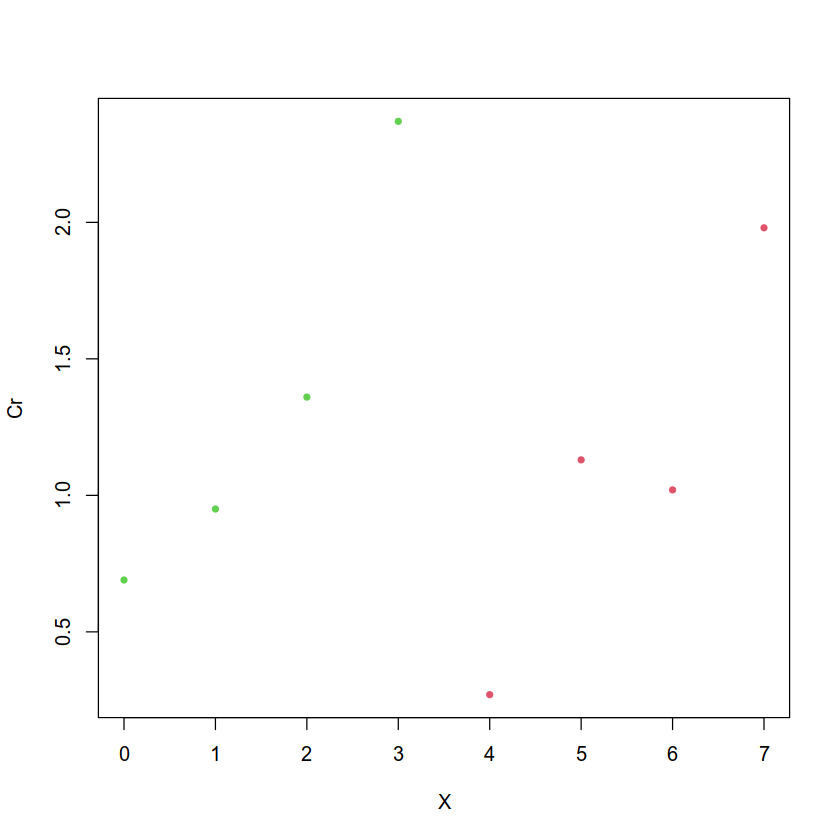

In [58]:
plot(crnew, col=cl$cluster+1, pch=20)

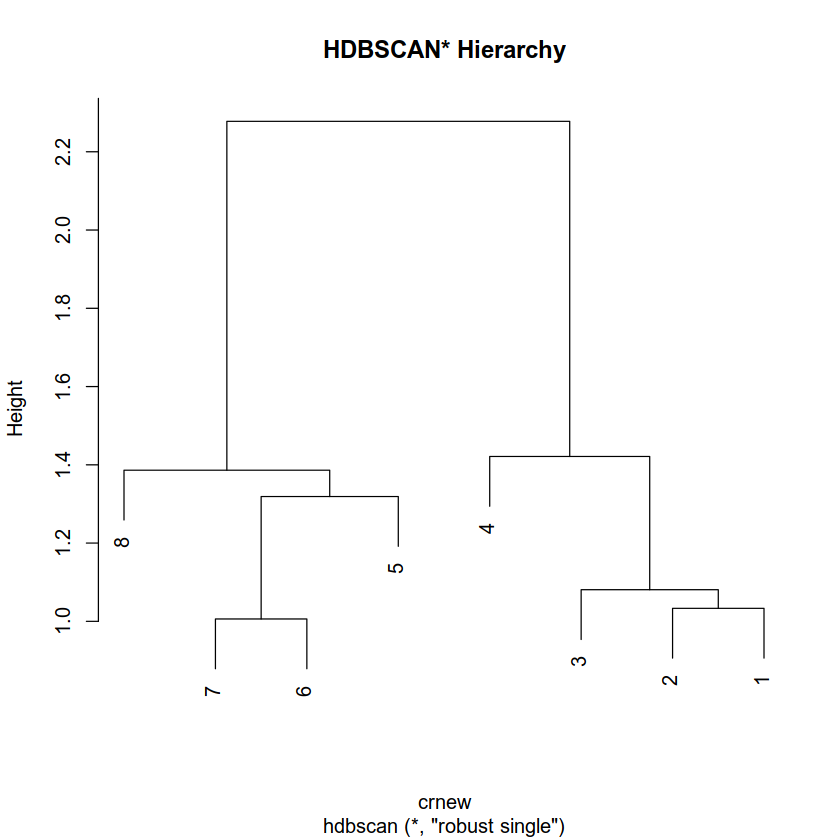

In [59]:
plot(cl$hc, main="HDBSCAN* Hierarchy")

In [60]:
require(stats)

In [61]:
res.dist <- dist(x= crnew.scaled, method= "euclidean")

In [62]:
x <- as.matrix(res.dist)[1:6, 1:6] 

In [63]:
x

,Ghagra (Clupisoma garua),Koi (Anabas testudineus),Tatkini (Cirrhinus reba),Tengra (Mystus vittatus),Batashi (Neotropius atherinoides),Jatka (juvenile) Tenualosa ilisha
Ghagra (Clupisoma garua),0.0000000,0.5598543,1.2811319,2.761860,1.746327,2.141729
Koi (Anabas testudineus),0.5598543,0.0000000,0.7291352,2.246016,1.582385,1.654392
Tatkini (Cirrhinus reba),1.2811319,0.7291352,0.0000000,1.543199,1.801726,1.270769
Tengra (Mystus vittatus),2.7618605,2.2460159,1.5431992,0.000000,3.121133,2.001259
Batashi (Neotropius atherinoides),1.7463272,1.5823852,1.8017265,3.121133,0.000000,1.331336
Jatka (juvenile) Tenualosa ilisha,2.1417289,1.6543918,1.2707691,2.001259,1.331336,0.000000


In [64]:
round(x, digits = 3)

,Ghagra (Clupisoma garua),Koi (Anabas testudineus),Tatkini (Cirrhinus reba),Tengra (Mystus vittatus),Batashi (Neotropius atherinoides),Jatka (juvenile) Tenualosa ilisha
Ghagra (Clupisoma garua),0.000,0.560,1.281,2.762,1.746,2.142
Koi (Anabas testudineus),0.560,0.000,0.729,2.246,1.582,1.654
Tatkini (Cirrhinus reba),1.281,0.729,0.000,1.543,1.802,1.271
Tengra (Mystus vittatus),2.762,2.246,1.543,0.000,3.121,2.001
Batashi (Neotropius atherinoides),1.746,1.582,1.802,3.121,0.000,1.331
Jatka (juvenile) Tenualosa ilisha,2.142,1.654,1.271,2.001,1.331,0.000


In [206]:
res.dist

                                  Ghagra (Clupisoma garua)
Koi (Anabas testudineus)                         0.5598543
Tatkini (Cirrhinus reba)                         1.2811319
Tengra (Mystus vittatus)                         2.7618605
Batashi (Neotropius atherinoides)                1.7463272
Jatka (juvenile) Tenualosa ilisha                2.1417289
Rani (Botia dario)                               2.4972863
Chanda (Pseudambassis ranga)                     3.4321551
                                  Koi (Anabas testudineus)
Koi (Anabas testudineus)                                  
Tatkini (Cirrhinus reba)                         0.7291352
Tengra (Mystus vittatus)                         2.2460159
Batashi (Neotropius atherinoides)                1.5823852
Jatka (juvenile) Tenualosa ilisha                1.6543918
Rani (Botia dario)                               2.0438457
Chanda (Pseudambassis ranga)                     2.8815587
                                  Tatkini (Cirrhinus reb

In [65]:
res.hc <- hclust(d= res.dist, method= "complete")

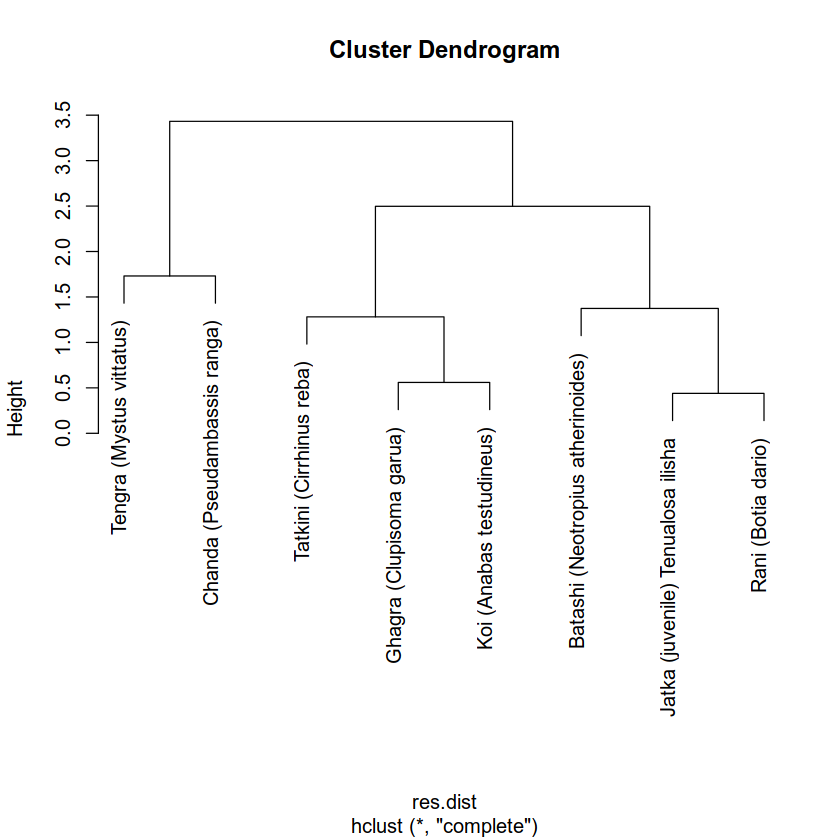

In [66]:
plot(res.hc)

In [68]:
res.hc


Call:
hclust(d = res.dist, method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 8 


In [69]:
require(factoextra)

Loading required package: factoextra

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2
3.3.4.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>.”


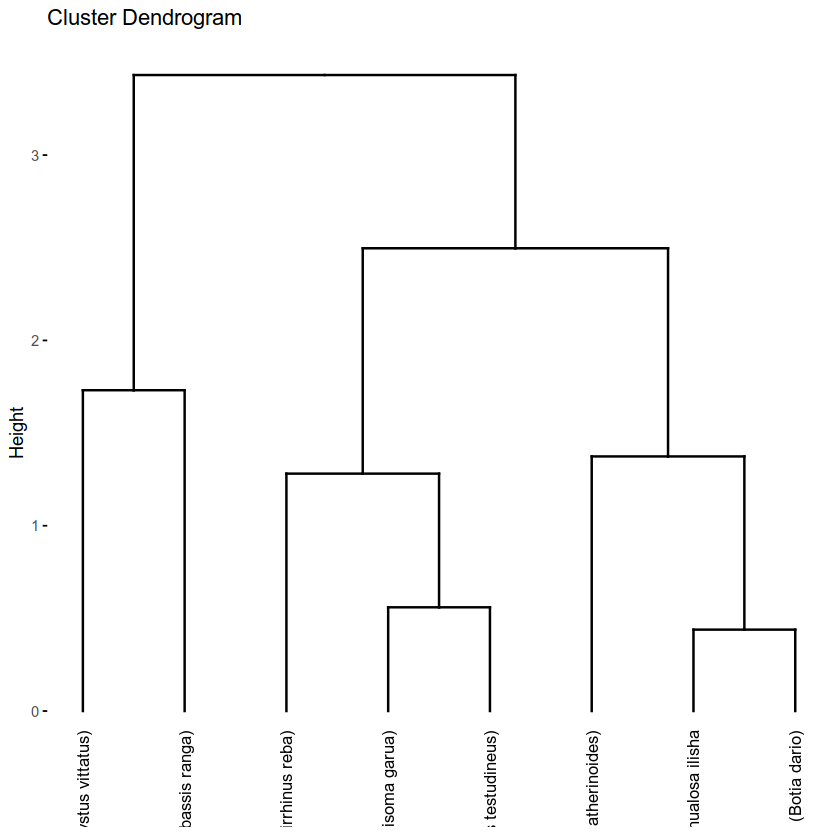

In [70]:
fviz_dend(x= res.hc, cex= 0.7, lwd = 0.7)

In [76]:
require(ggsci)

Loading required package: ggsci



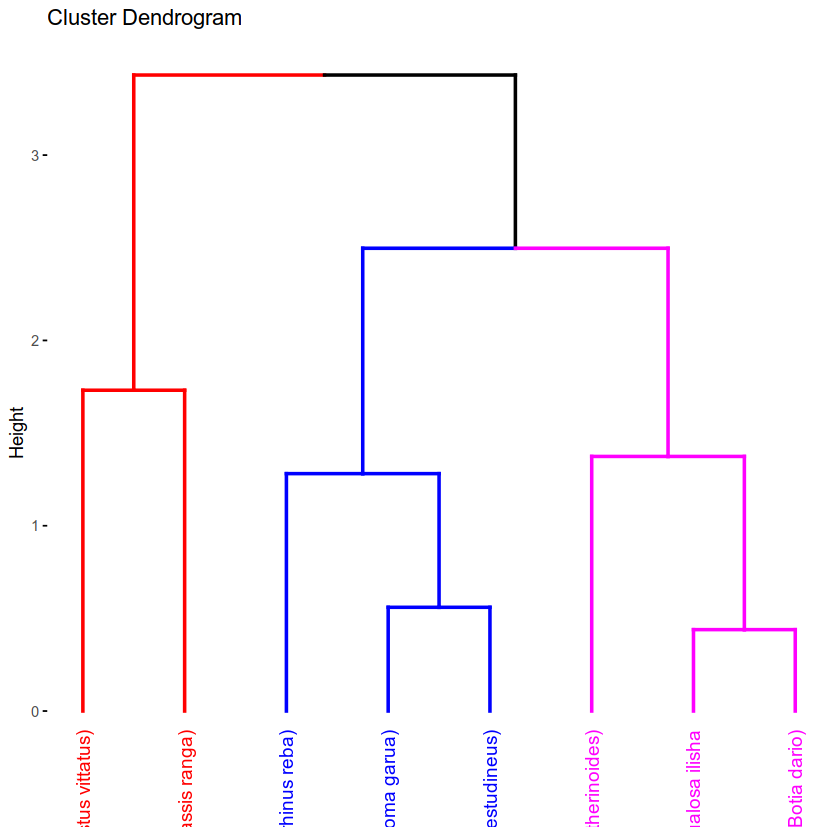

In [82]:
fviz_dend(x= res.hc, cex= 0.8, lwd = 1, k = 3, k_colors = c("red","blue", "magenta" ))

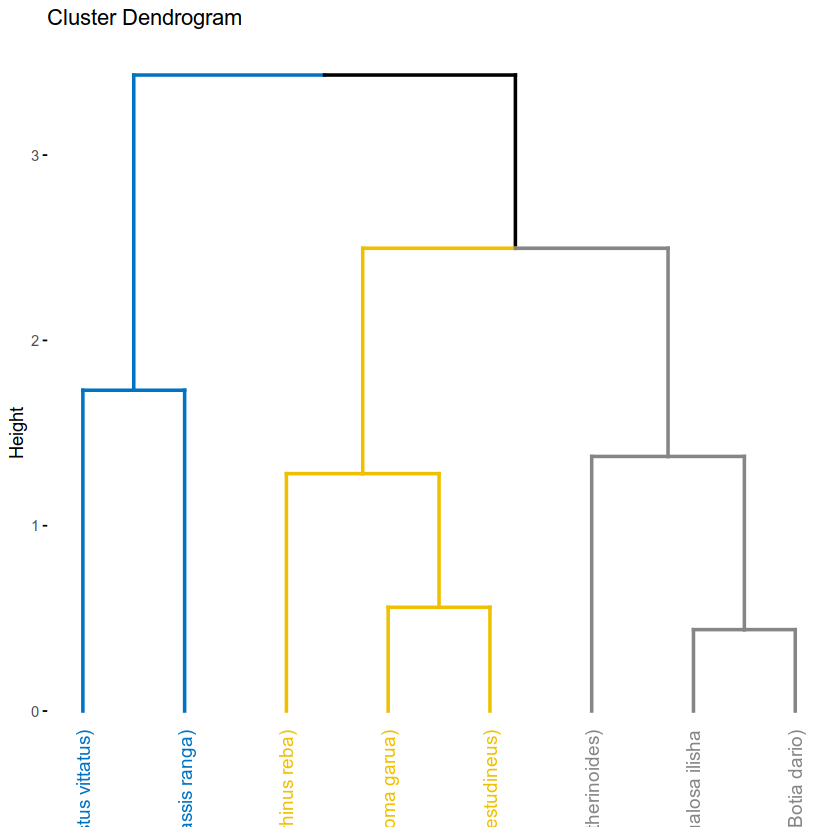

In [83]:
fviz_dend(x= res.hc, cex= 0.8, lwd = 1, k = 3, k_colors = "jco")

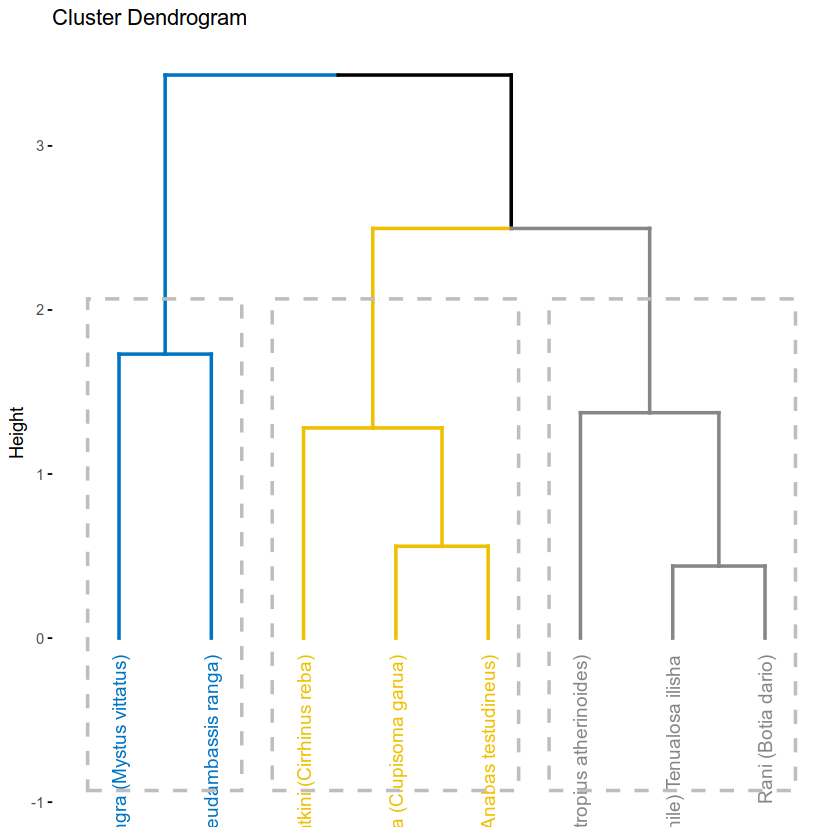

In [84]:
fviz_dend(x= res.hc, cex= 0.8, 
          lwd = 1, k = 3,
          rect = TRUE,
          rect_border = "gray",
          rect_fill = FALSE,
          k_colors = "jco")

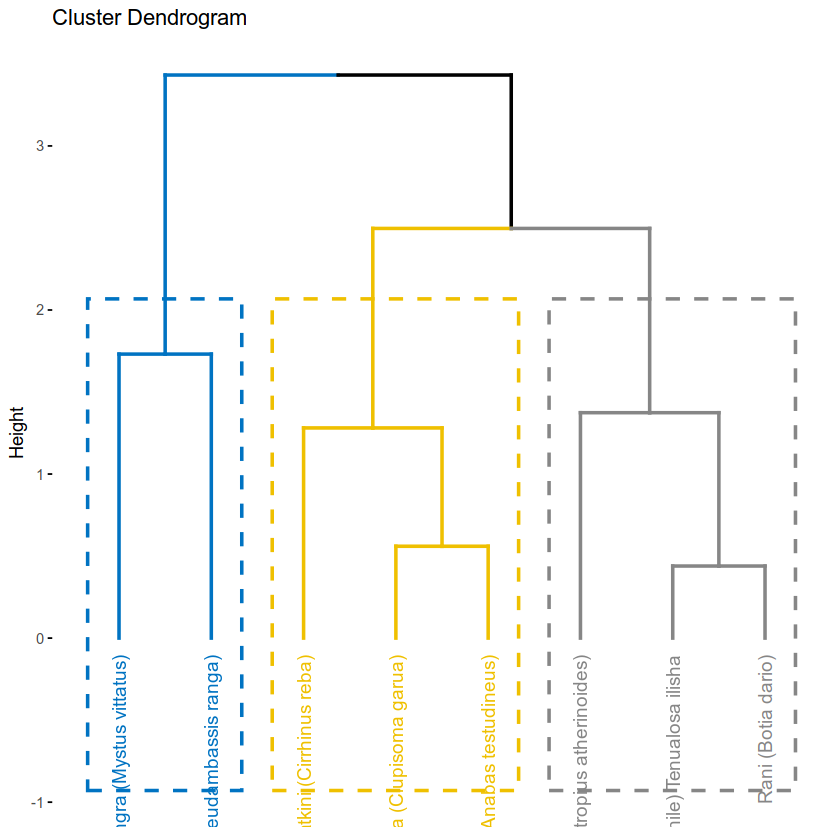

In [267]:
fviz_dend(x= res.hc, cex= 0.8, 
          lwd = 1, k = 3,
          rect = TRUE,
          rect_border = "jco",
          rect_fill = FALSE,
          k_colors = "jco")

Coordinate system already present. Adding new coordinate system, which will replace the
existing one.


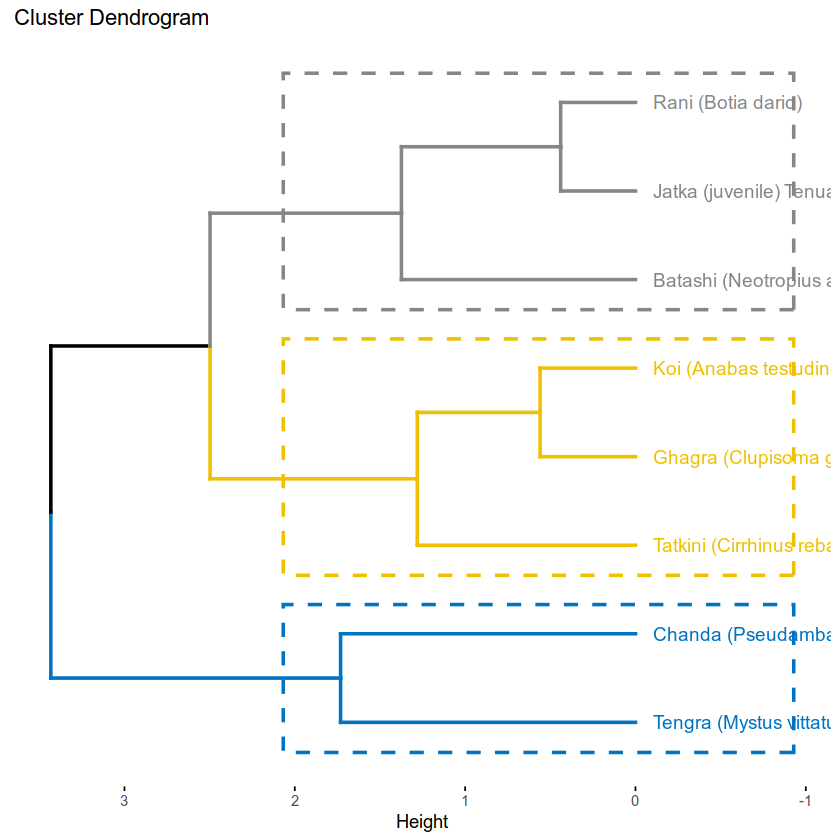

In [90]:
fviz_dend(x= res.hc, cex= 0.8, 
          lwd = 1, k = 3,
          rect = TRUE,
          rect_border = "jco",
          rect_fill = FALSE,
          k_colors = "jco",
         horiz = TRUE, rotate= TRUE)b

In [92]:
p <- fviz_dend(x= res.hc, cex= 0.8, 
          lwd = 1, k = 3,
          rect = TRUE,
          rect_border = "jco",
          rect_fill = FALSE,
          k_colors = "jco",
         horiz = TRUE, rotate= TRUE)

Coordinate system already present. Adding new coordinate system, which will replace the
existing one.


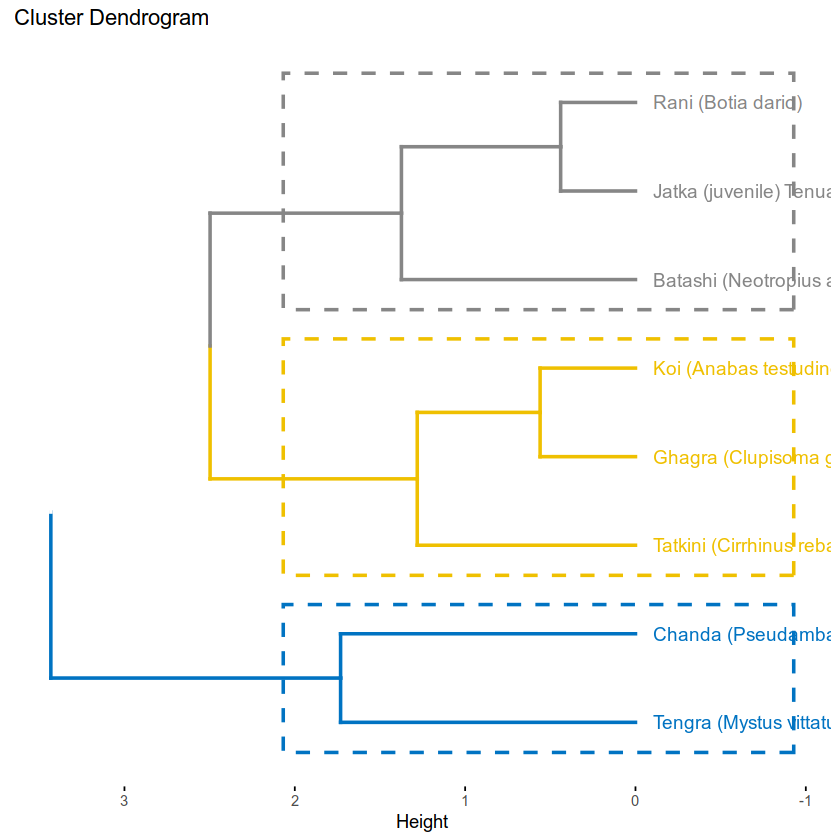

In [94]:
p$layers[[1]]$data$col[p$layers[[1]]$data$col == "black"] <- "white"
p$layers[[2]]$data$angle <- 0
p

In [103]:
install.packages("ape")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [107]:
require("ape")

Loading required package: ape



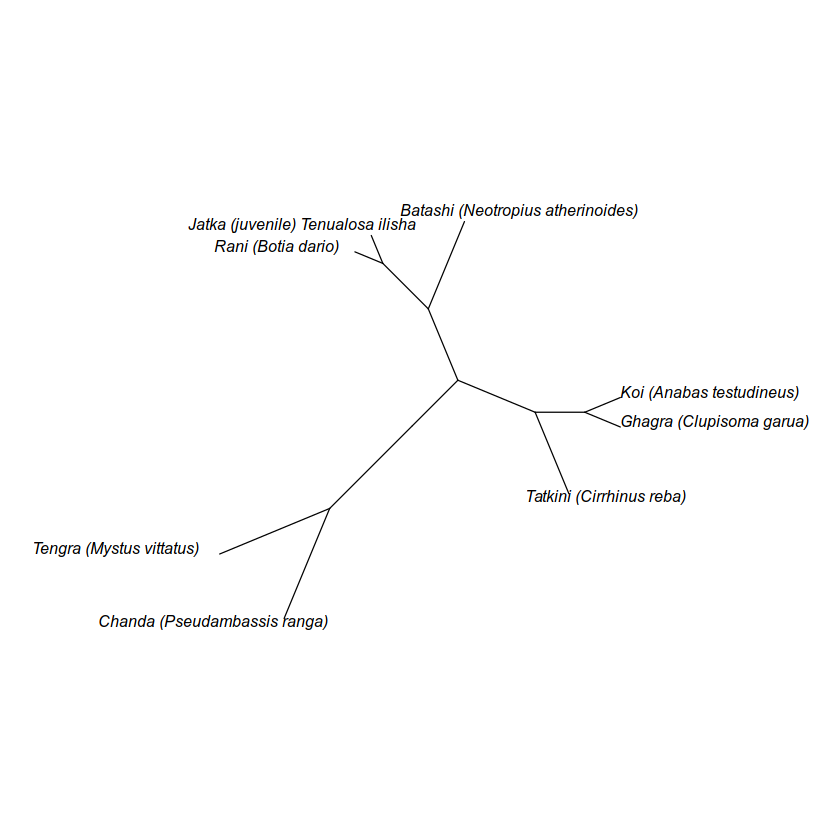

In [114]:
plot(as.phylo(res.hc), type = "unrooted", cex = 0.8,
     no.margin = TRUE)

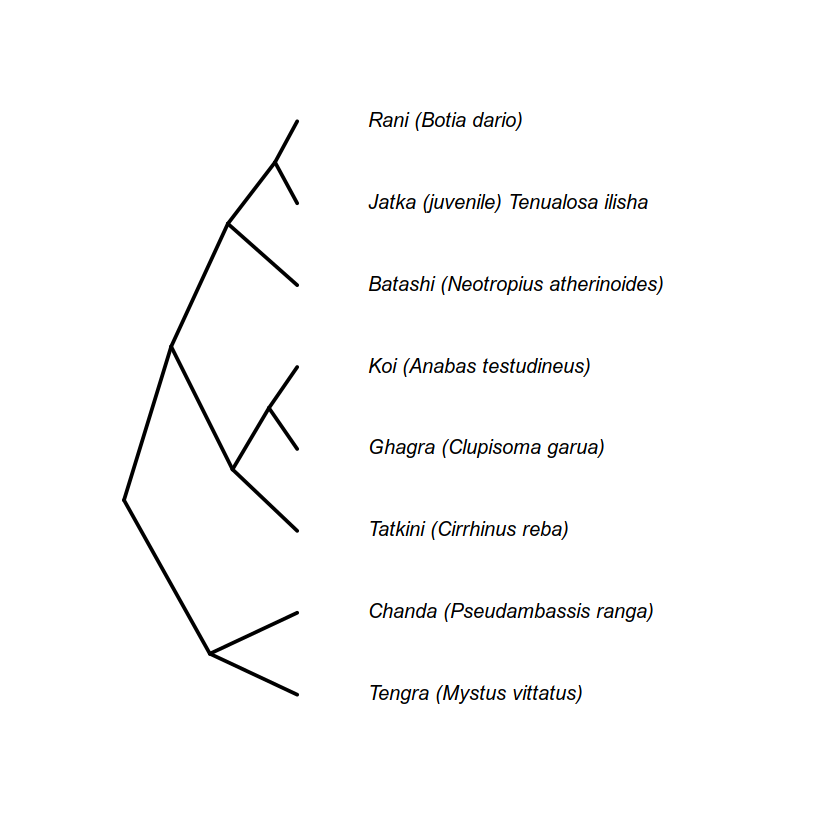

In [128]:
plot(as.phylo(res.hc), type = "cladogram", cex = 1, 
     label.offset = 0.7, edge.width = 3)

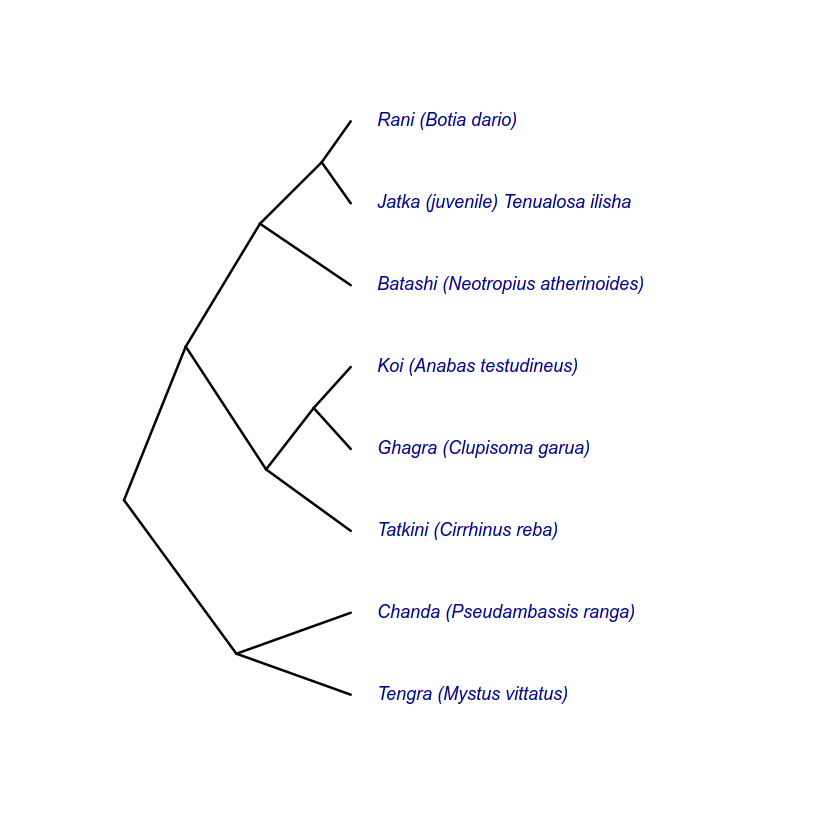

In [138]:
plot(as.phylo(res.hc), type = "cladogram", cex = 0.9,
     edge.color = "black", edge.width = 2, edge.lty = 1,
     tip.color = "darkblue", label.offset = 0.2)

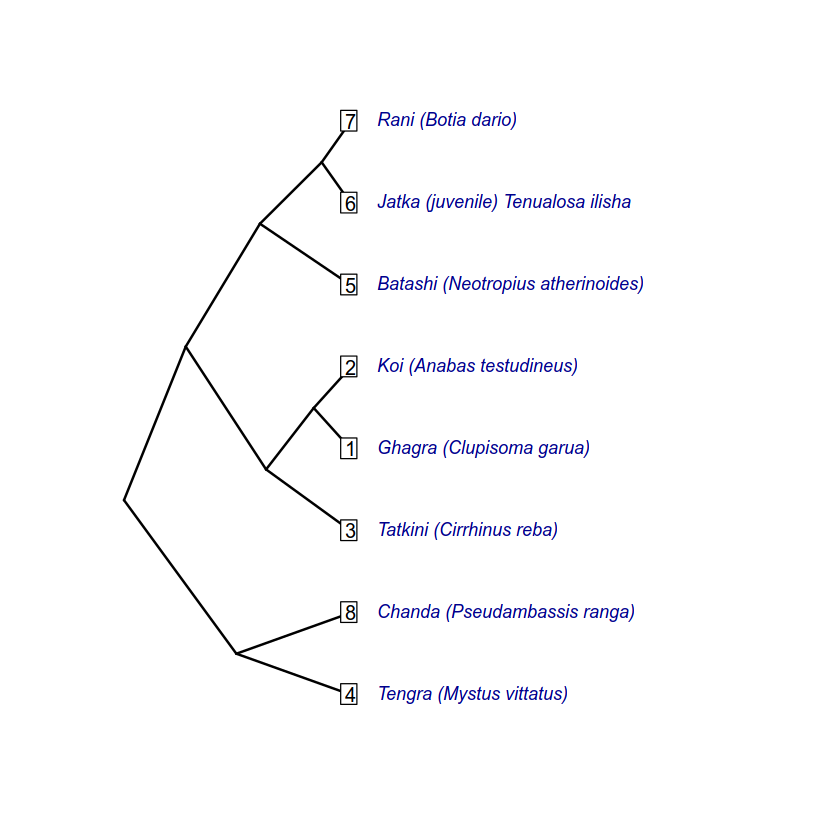

In [157]:
plot(as.phylo(res.hc), type = "cladogram", cex = 0.9,
     edge.color = "black", edge.width = 2, edge.lty = 1,
     tip.color = "darkblue", label.offset = 0.2) 
tiplabels(col = "black", bg= "white")
#nodelabels()

ERROR: Error in plot(as.phylo(res.hc), type = "unrooted", cex = 0.9, edge.color = "black", : non-numeric argument to binary operator


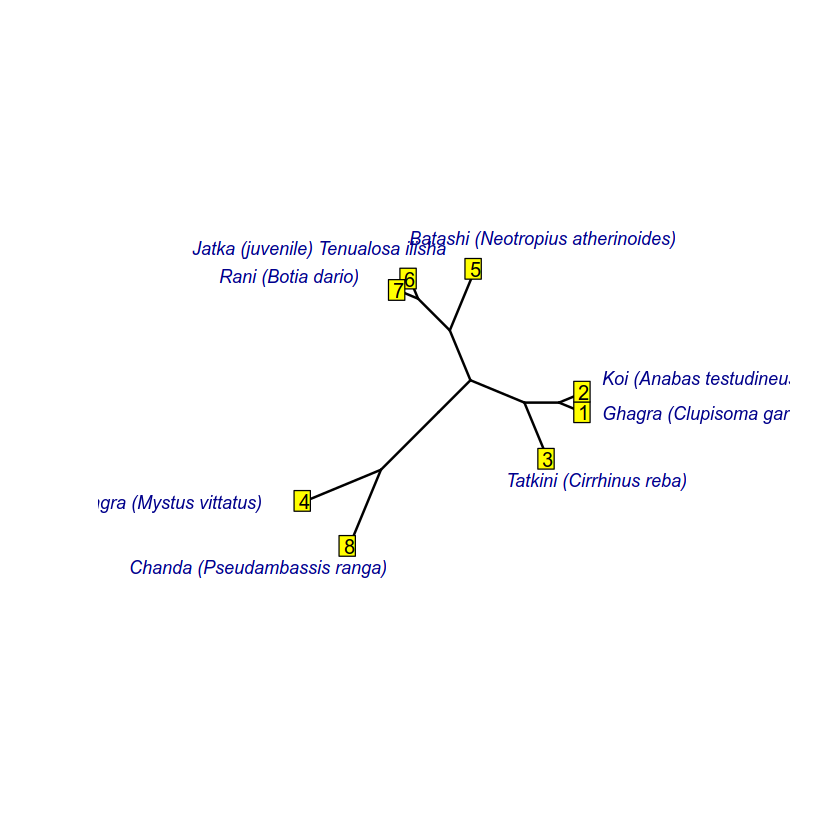

In [154]:
plot(as.phylo(res.hc), type = "unrooted", cex = 0.9,
     edge.color = "black", edge.width = 2, edge.lty = 1,
     tip.color = "darkblue", label.offset = 0.2)+
    tiplabels()


In [150]:
require("gridExtra")

Loading required package: gridExtra



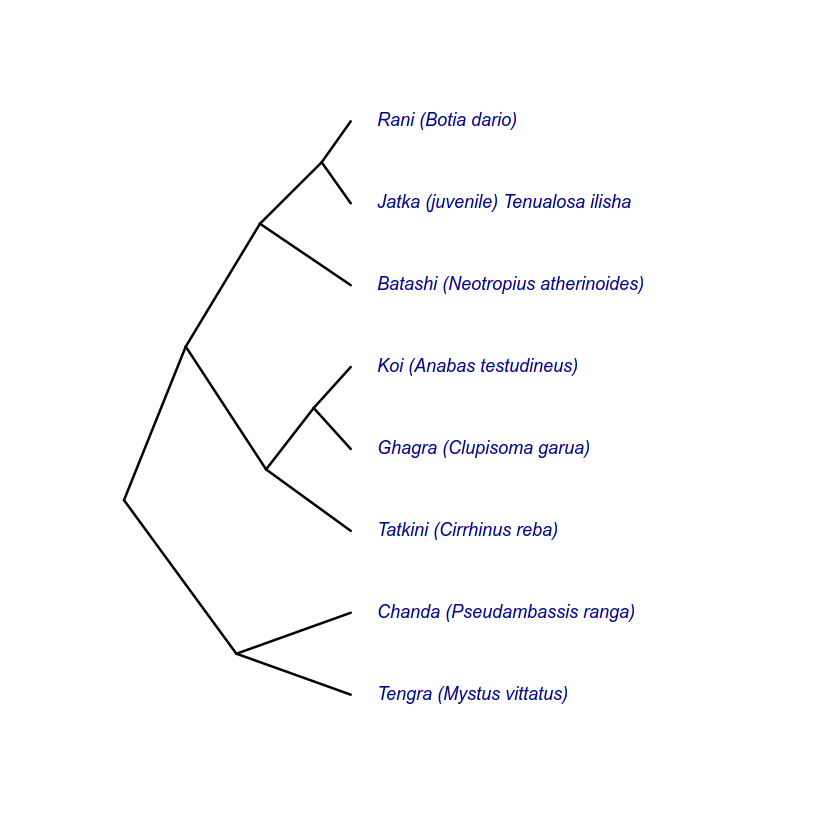

In [165]:
p1 <- plot(as.phylo(res.hc), type = "cladogram", cex = 0.9,
     edge.color = "black", edge.width = 2, edge.lty = 1,
     tip.color = "darkblue", label.offset = 0.2)

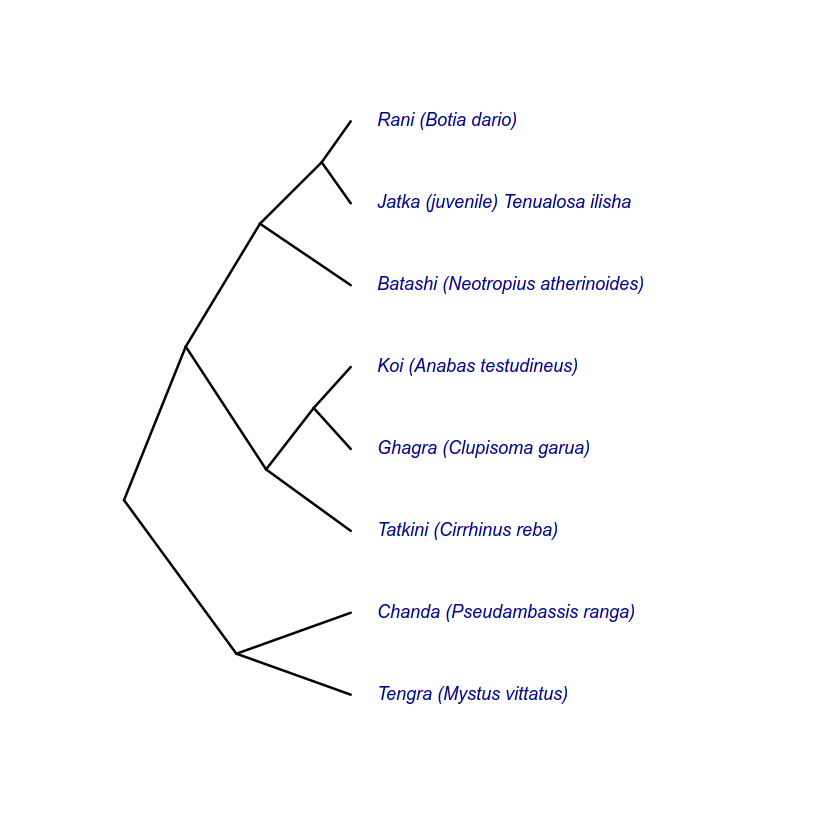

In [167]:
p2 <- plot(as.phylo(res.hc), type = "cladogram", cex = 0.9,
     edge.color = "black", edge.width = 2, edge.lty = 1,
     tip.color = "darkblue", label.offset = 0.2)

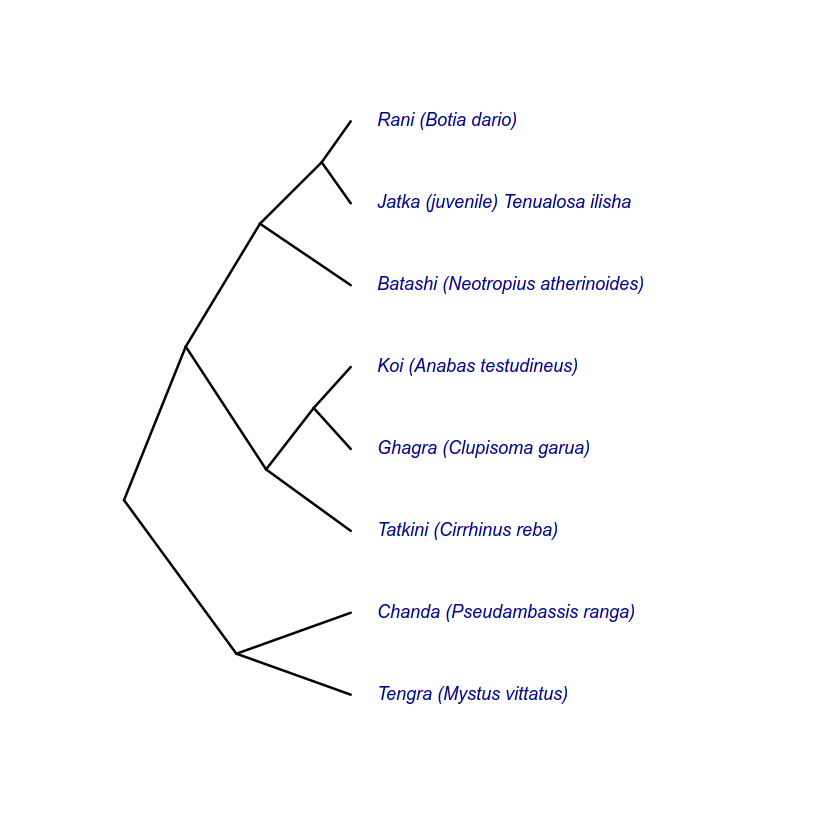

In [168]:
p3 <- plot(as.phylo(res.hc), type = "cladogram", cex = 0.9,
     edge.color = "black", edge.width = 2, edge.lty = 1,
     tip.color = "darkblue", label.offset = 0.2)

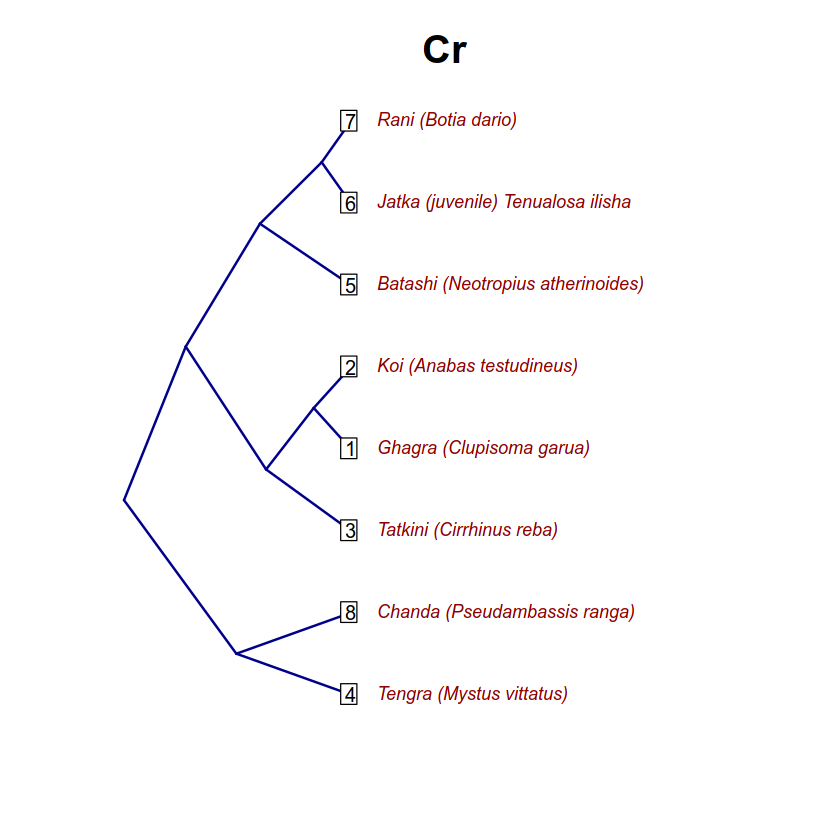

In [205]:
plot(as.phylo(res.hc), type = "cladogram", cex = 0.9,
     edge.color = "darkblue", edge.width = 2, edge.lty = 1,
     tip.color = "darkred", label.offset = 0.2, main = "Cr", cex.main = 2)
tiplabels(col = "black", bg= "white")

In [176]:
library(cowplot)

In [171]:
library(gridExtra)
library(grid)
library(ggplot2)
library(lattice)

In [208]:
cr

,X,Cr,Fish
,<int>,<dbl>,<chr>
Ghagra (Clupisoma garua),0,0.69,Ghagra (Clupisoma garua)
Koi (Anabas testudineus),1,0.95,Koi (Anabas testudineus)
Tatkini (Cirrhinus reba),2,1.36,Tatkini (Cirrhinus reba)
Tengra (Mystus vittatus),3,2.37,Tengra (Mystus vittatus)
Batashi (Neotropius atherinoides),4,0.27,Batashi (Neotropius atherinoides)
Jatka (juvenile) Tenualosa ilisha,5,1.13,Jatka (juvenile) Tenualosa ilisha
Rani (Botia dario),6,1.02,Rani (Botia dario)
Chanda (Pseudambassis ranga),7,1.98,Chanda (Pseudambassis ranga)


In [210]:
cr$Fish <- as.character(x = cr$Fish)
rownames(cr) <- c(cr$Fish)

In [211]:
crnew <- cr[,-3]

In [212]:
crnew

,X,Cr
,<int>,<dbl>
Ghagra (Clupisoma garua),0,0.69
Koi (Anabas testudineus),1,0.95
Tatkini (Cirrhinus reba),2,1.36
Tengra (Mystus vittatus),3,2.37
Batashi (Neotropius atherinoides),4,0.27
Jatka (juvenile) Tenualosa ilisha,5,1.13
Rani (Botia dario),6,1.02
Chanda (Pseudambassis ranga),7,1.98


In [231]:
crnew.scaled <- scale(crnew)
crnew.scaled

,X,Cr
Ghagra (Clupisoma garua),-1.4288690,-0.7827887
Koi (Anabas testudineus),-1.0206207,-0.3996827
Tatkini (Cirrhinus reba),-0.6123724,0.2044460
Tengra (Mystus vittatus),-0.2041241,1.6926655
Batashi (Neotropius atherinoides),0.2041241,-1.4016523
Jatka (juvenile) Tenualosa ilisha,0.6123724,-0.1344555
Rani (Botia dario),1.0206207,-0.2965388
Chanda (Pseudambassis ranga),1.4288690,1.1180065


In [245]:
cl <- hdbscan(crnew.scaled, minPts= 2)
cl

HDBSCAN clustering for 8 objects.
Parameters: minPts = 2
The clustering contains 2 cluster(s) and 3 noise points.

0 1 2 
3 2 3 

Available fields: cluster, minPts, coredist, cluster_scores,
                  membership_prob, outlier_scores, hc

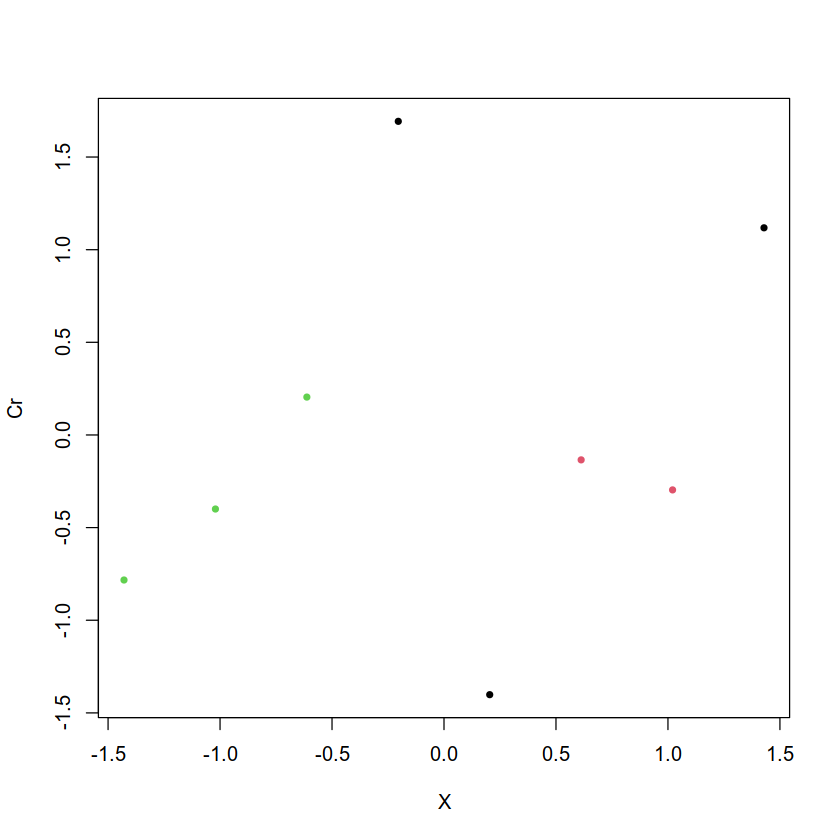

In [246]:
plot(crnew.scaled, col=cl$cluster+1, pch=20)

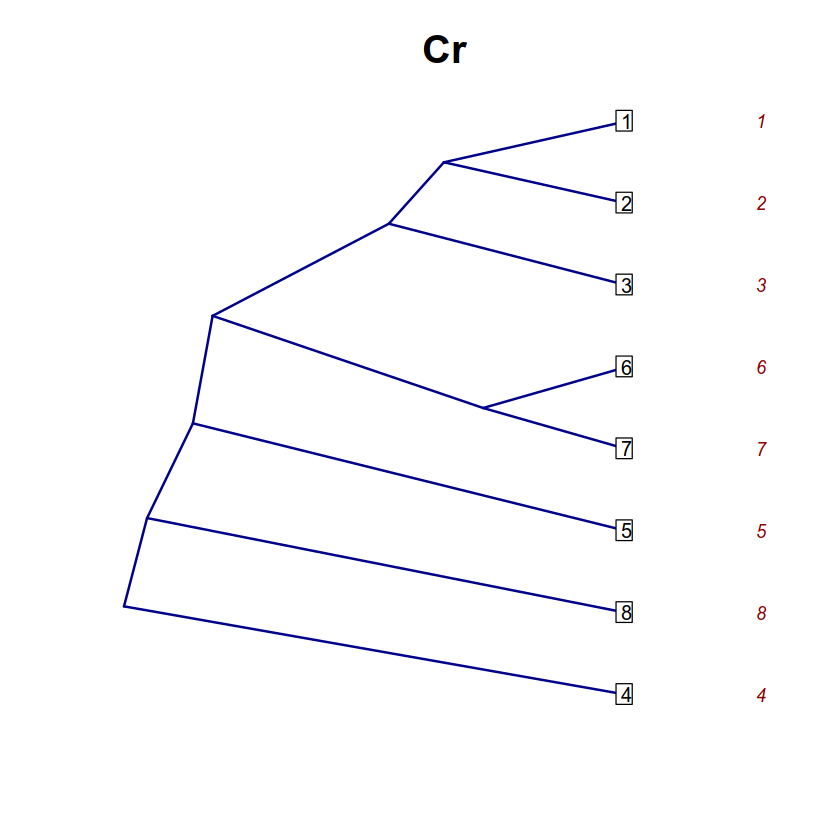

In [250]:
plot(as.phylo(cl$hc), type = "cladogram", cex = 0.9,
     edge.color = "darkblue", edge.width = 2, edge.lty = 1,
     tip.color = "darkred", label.offset = 0.2, main = "Cr", cex.main = 2)
tiplabels(col = "black", bg= "white")

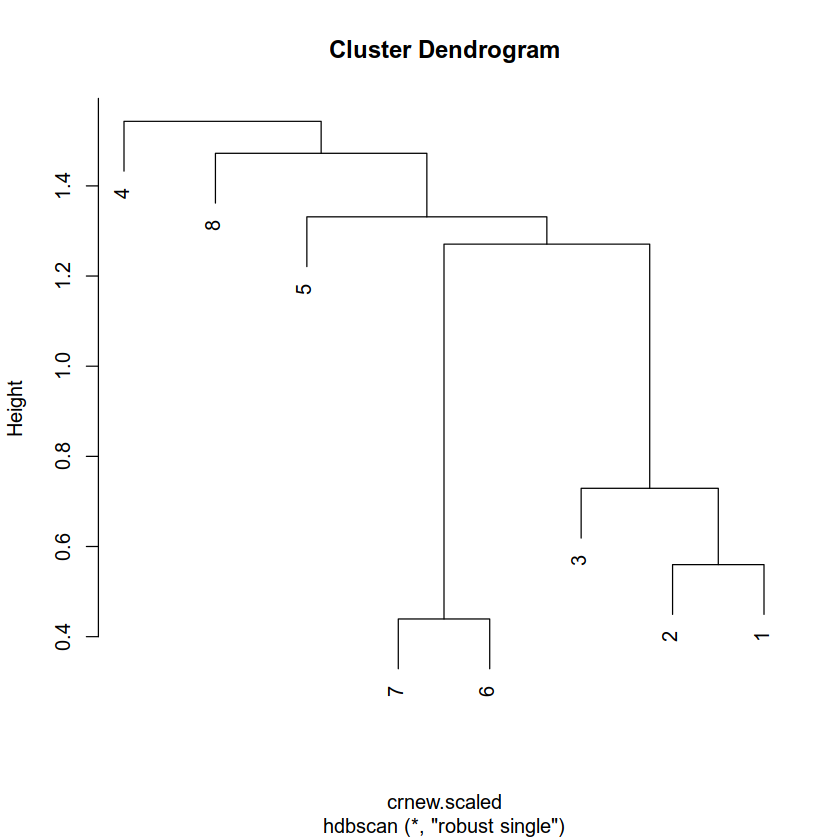

In [254]:
plot(cl$hc)

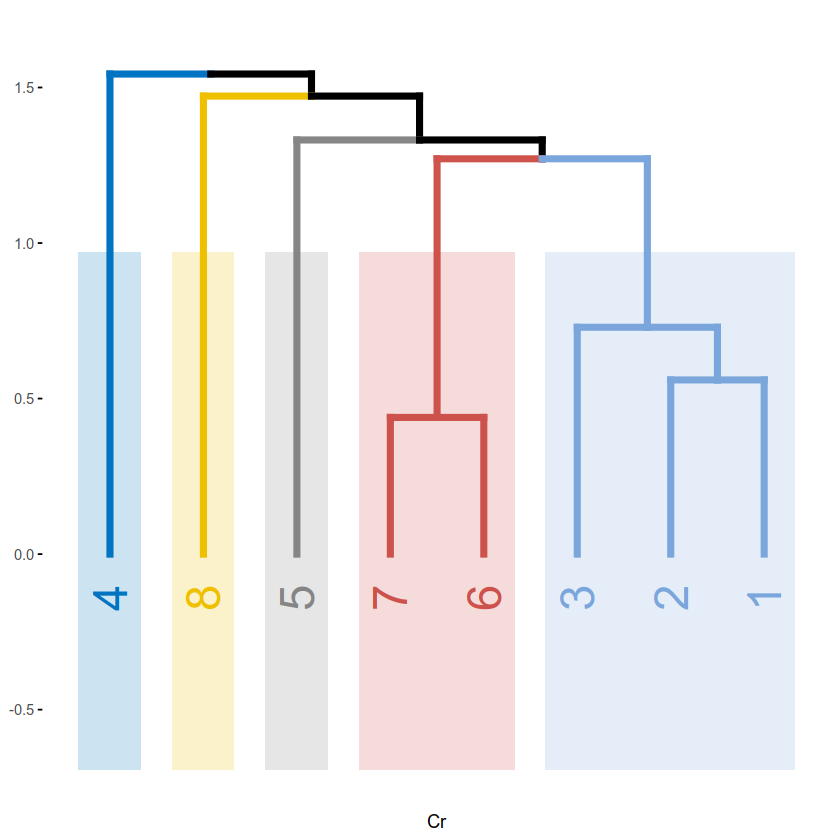

In [271]:
fviz_dend(x= cl$hc, cex= 2, 
          lwd = 2, k = 5,
          rect = TRUE,
          rect_border = "jco",
          rect_fill = TRUE,
          k_colors = "jco", main = "", xlab = "Cr", ylab= "")

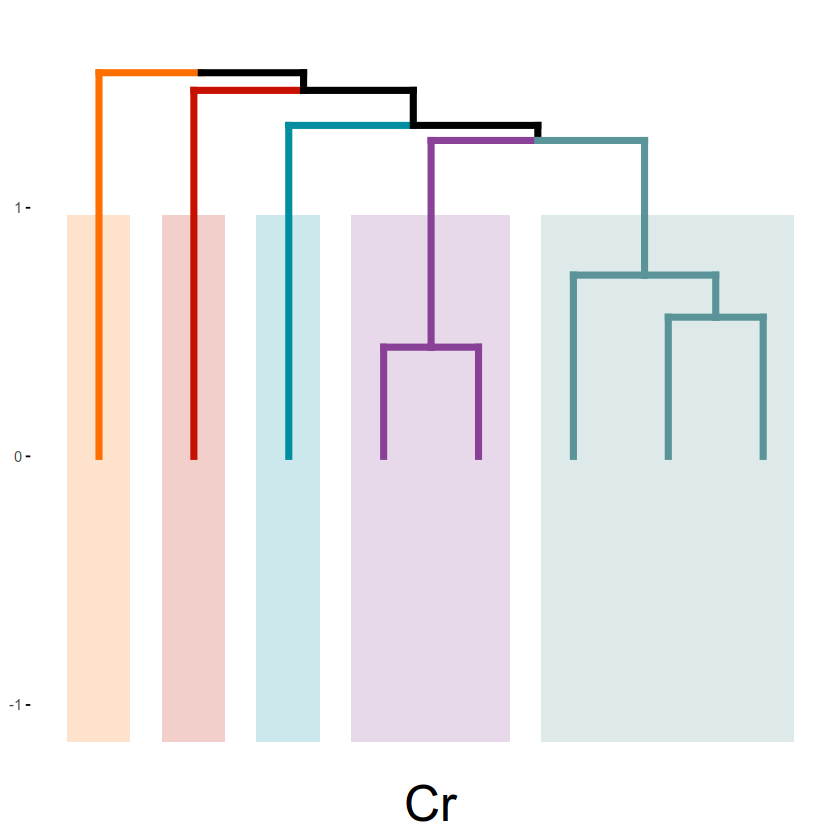

In [310]:
colp = "futurama"
fviz_dend(x= cl$hc, cex= 0, 
          lwd = 2, k = 5,
          rect = TRUE,
          rect_border = colp,
          rect_fill = TRUE,
          k_colors = colp, main = "", xlab = "Cr", ylab= "", labels_track_height = 0.65, cex.lab = 10)+
            theme(axis.title = element_text(size = 30))

# Cr HDBSCAN

In [315]:
cr1 <- cr[, -3]

In [317]:
cr1 <- scale(cr1)
cr1

,X,Cr
Ghagra (Clupisoma garua),-1.4288690,-0.7827887
Koi (Anabas testudineus),-1.0206207,-0.3996827
Tatkini (Cirrhinus reba),-0.6123724,0.2044460
Tengra (Mystus vittatus),-0.2041241,1.6926655
Batashi (Neotropius atherinoides),0.2041241,-1.4016523
Jatka (juvenile) Tenualosa ilisha,0.6123724,-0.1344555
Rani (Botia dario),1.0206207,-0.2965388
Chanda (Pseudambassis ranga),1.4288690,1.1180065


In [318]:
clcr <- hdbscan(cr1, minPts = 2)

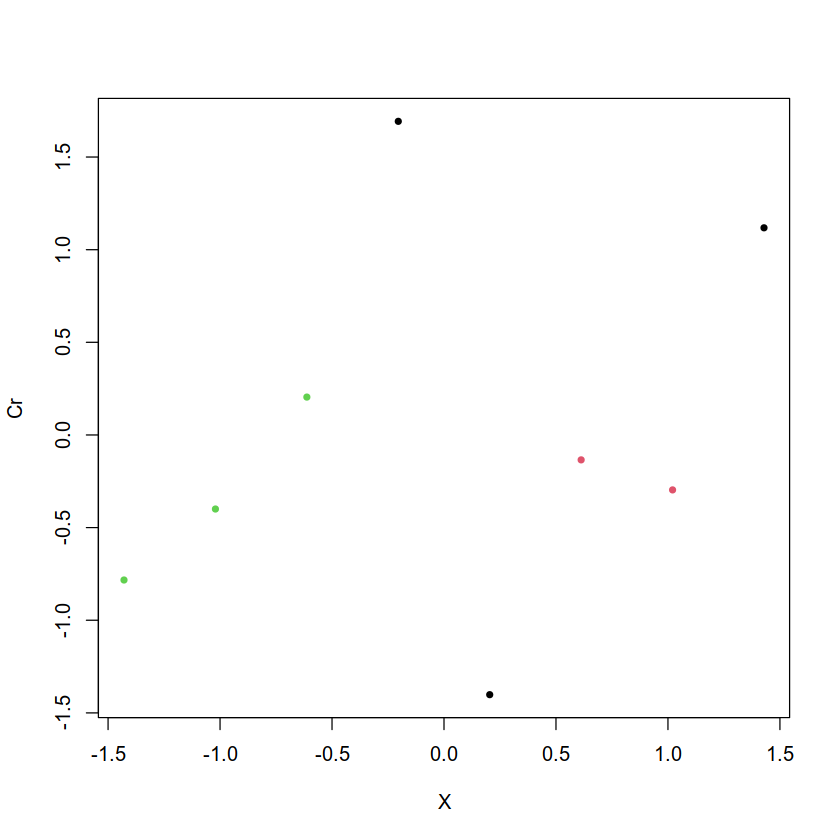

In [319]:
plot(cr1, col=clcr$cluster+1, pch=20)

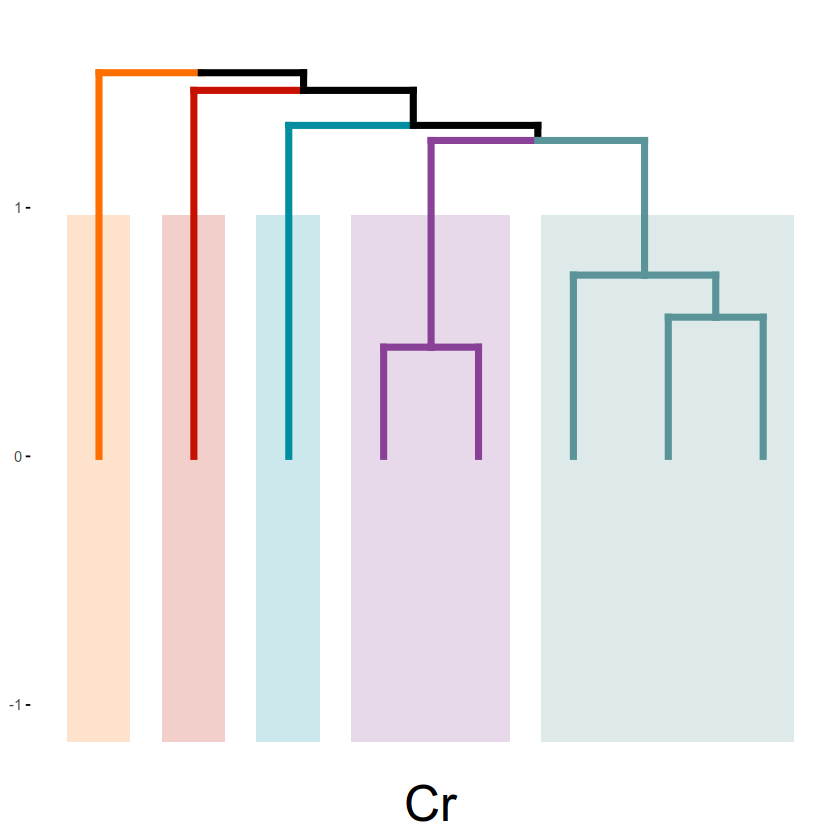

In [320]:
colp = "futurama"
fviz_dend(x= clcr$hc, cex= 0, 
          lwd = 2, k = 5,
          rect = TRUE,
          rect_border = colp,
          rect_fill = TRUE,
          k_colors = colp, main = "", xlab = "Cr", ylab= "", labels_track_height = 0.65, cex.lab = 10)+
            theme(axis.title = element_text(size = 30))

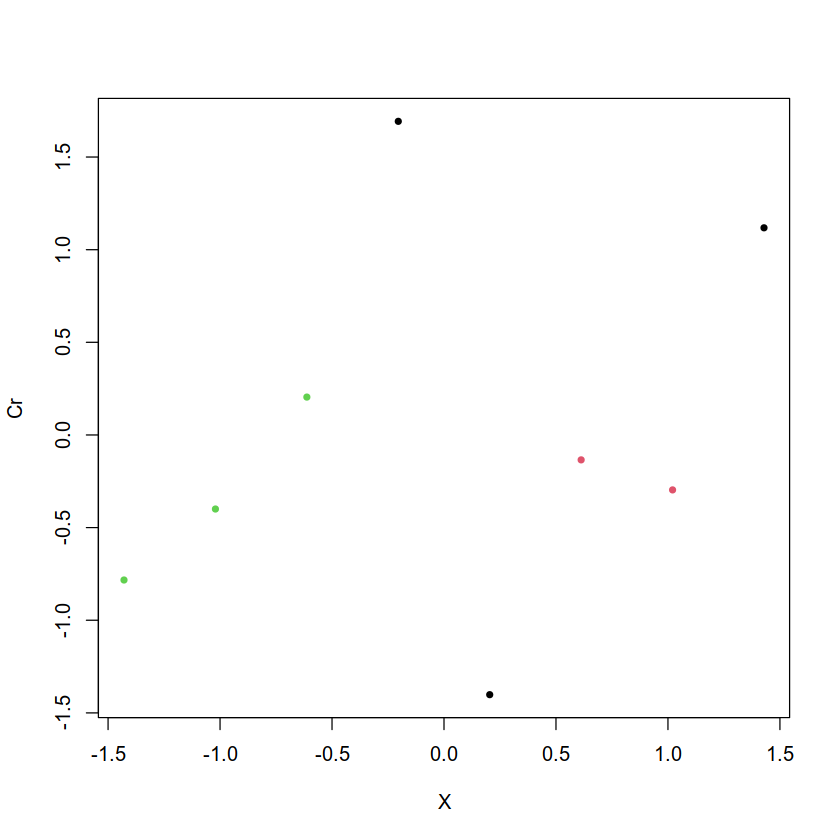

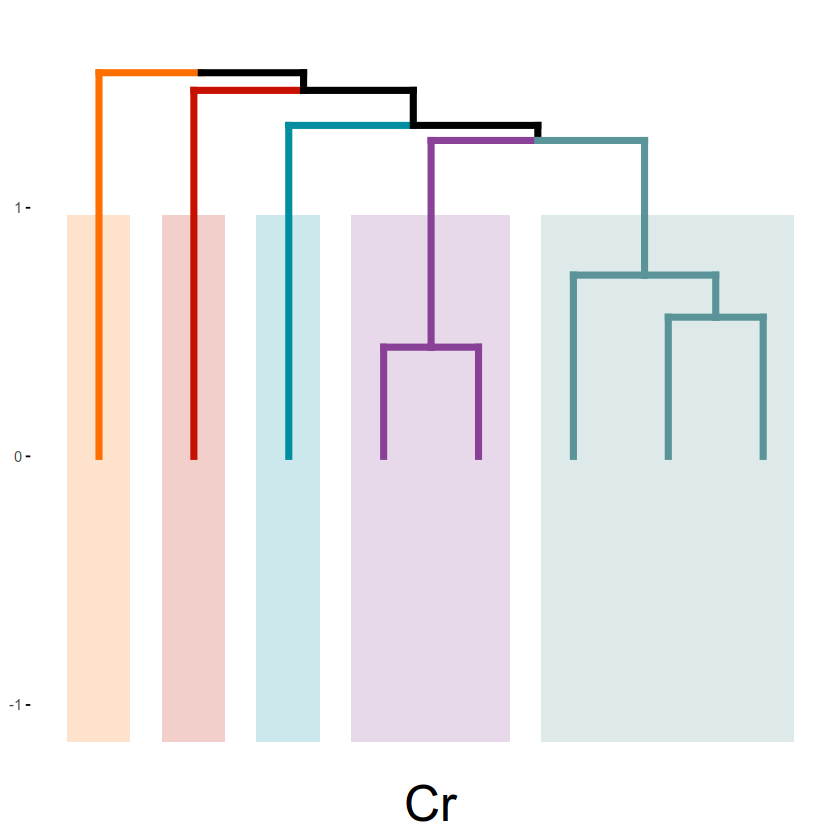

In [321]:
cr1 <- cr[, -3]
cr1 <- scale(cr1)
clcr <- hdbscan(cr1, minPts = 2)
plot(cr1, col=clcr$cluster+1, pch=20)
colp = "futurama"
fviz_dend(x= clcr$hc, cex= 0, 
          lwd = 2, k = 5,
          rect = TRUE,
          rect_border = colp,
          rect_fill = TRUE,
          k_colors = colp, main = "", xlab = "Cr", ylab= "", labels_track_height = 0.65, cex.lab = 10)+
            theme(axis.title = element_text(size = 30))

# Mn 

In [322]:
mn

X,Mn,Fish
<int>,<dbl>,<chr>
0,1.63,Ghagra (Clupisoma garua)
1,0.49,Koi (Anabas testudineus)
2,0.42,Tatkini (Cirrhinus reba)
3,0.74,Tengra (Mystus vittatus)
4,0.35,Batashi (Neotropius atherinoides)
5,0.93,Jatka (juvenile) Tenualosa ilisha
6,1.65,Rani (Botia dario)
7,1.78,Chanda (Pseudambassis ranga)


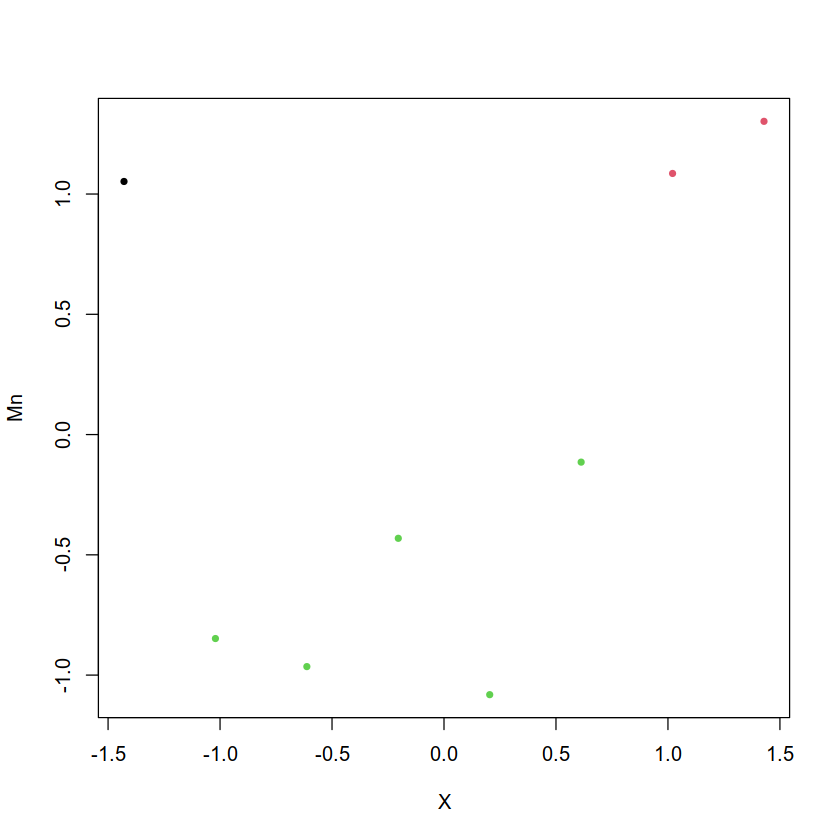

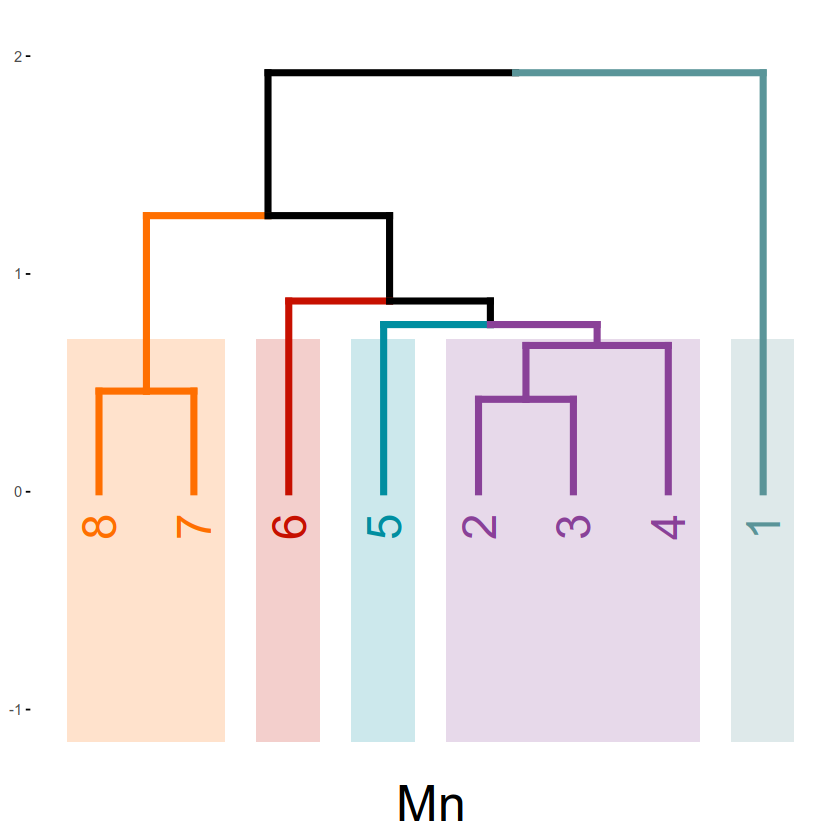

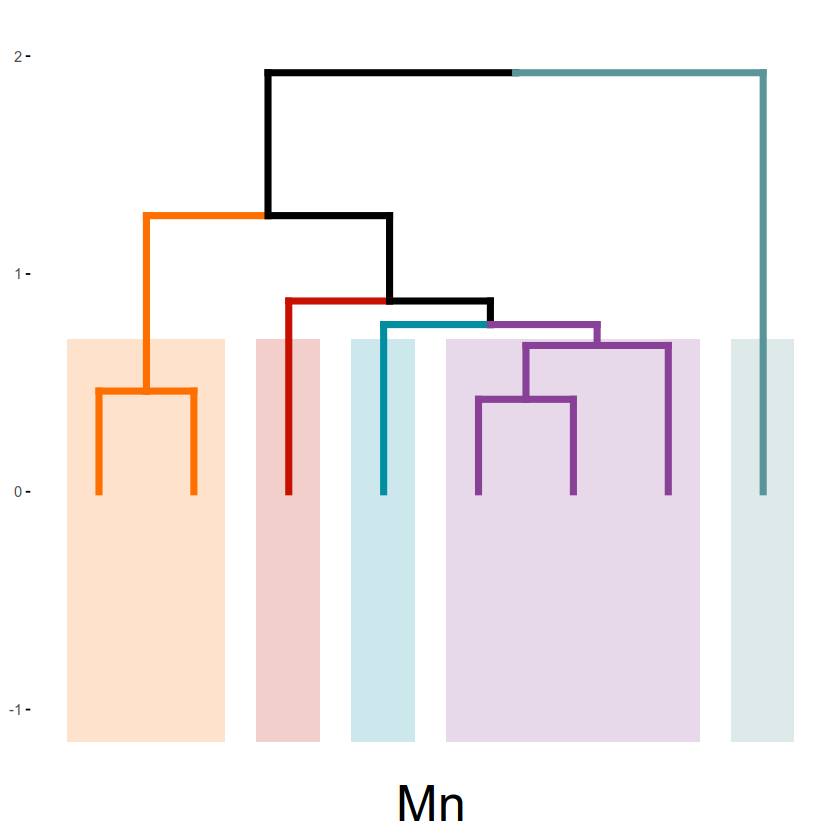

In [326]:
mn1 <- mn[, -3]
mn1 <- scale(mn1)
clmn <- hdbscan(mn1, minPts = 2)
plot(mn1, col=clmn$cluster+1, pch=20)
colp = "futurama"
fviz_dend(x= clmn$hc, cex= 2, 
          lwd = 2, k = 5,
          rect = TRUE,
          rect_border = colp,
          rect_fill = TRUE,
          k_colors = colp, main = "", xlab = "Mn", ylab= "", labels_track_height = 0.65, cex.lab = 10)+
            theme(axis.title = element_text(size = 30))
fviz_dend(x= clmn$hc, cex= 0, 
          lwd = 2, k = 5,
          rect = TRUE,
          rect_border = colp,
          rect_fill = TRUE,
          k_colors = colp, main = "", xlab = "Mn", ylab= "", labels_track_height = 0.65, cex.lab = 10)+
            theme(axis.title = element_text(size = 30))

In [330]:
p1 <- fviz_dend(x= clmn$hc, cex= 2, 
          lwd = 2, k = 5,
          rect = TRUE,
          rect_border = colp,
          rect_fill = TRUE,
          k_colors = colp, main = "", xlab = "Mn", ylab= "", labels_track_height = 0.65, cex.lab = 10)+
            theme(axis.title = element_text(size = 30))

p2 <- fviz_dend(x= clcr$hc, cex= 2, 
          lwd = 2, k = 5,
          rect = TRUE,
          rect_border = colp,
          rect_fill = TRUE,
          k_colors = colp, main = "", xlab = "Cr", ylab= "", labels_track_height = 0.65, cex.lab = 10)+
            theme(axis.title = element_text(size = 30))

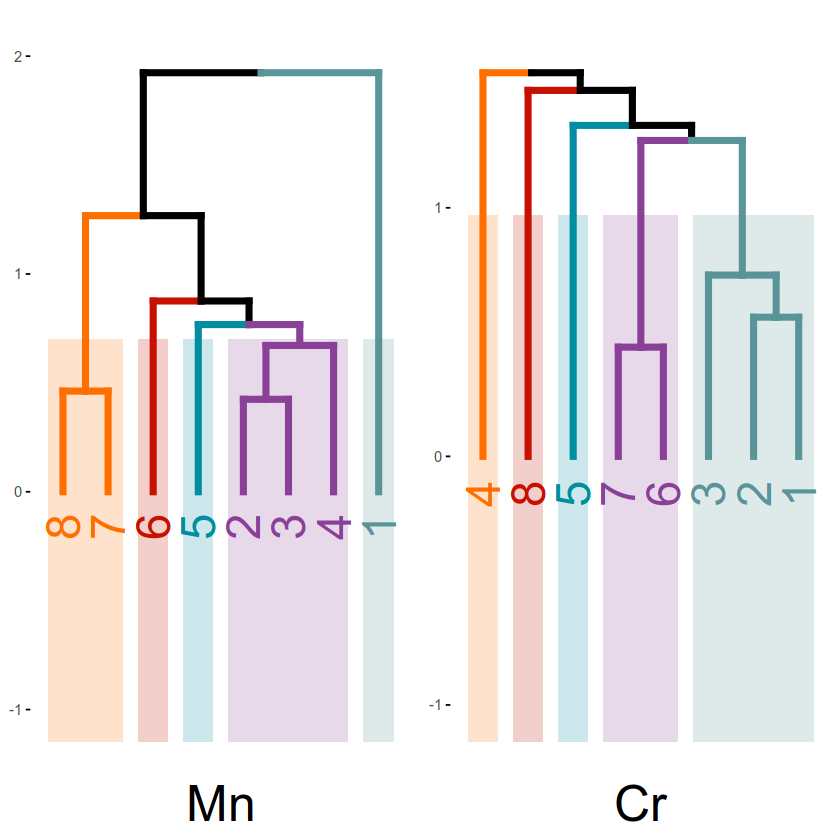

In [331]:
grid.arrange(p1,p2, ncol= 2)